<a href="https://colab.research.google.com/github/SteveChengChen/data-analysis/blob/main/stat_5291_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def my_wilcoxon(data_1, data_2):

    all_data = np.array(list(data_1) + list(data_2))

    from scipy.stats import rankdata

    ranks = rankdata(all_data, method='average')

    m = len(data_1)
    T1 = np.sum(ranks[:m])

    return T1

Group1 = [1.9168, 3.5102, 3.4567, 2.7052, 1.3366, 2.7654, 2.9780, 2.8394, 2.1455, 1.7992]
Group2 = [2.9204, 3.1500, 3.3405, 2.7374, 4.0499, 3.8547, 4.1359, 4.0159, 3.4328, 2.0894,
          3.7789, 4.2853, 2.8724, 3.0208, 3.1968]

T1_value = my_wilcoxon(Group1, Group2)
print("T1 for the given dataset =", T1_value)

T1 for the given dataset = 83.0


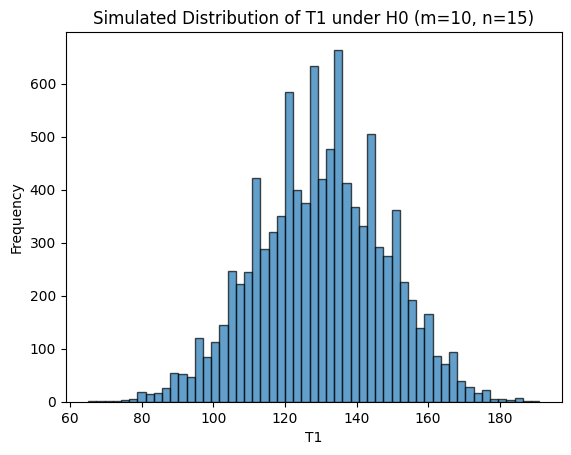

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

def my_wilcoxon(data_1, data_2):
    all_data = np.concatenate([data_1, data_2])
    ranks = rankdata(all_data, method='average')
    return np.sum(ranks[:len(data_1)])

m, n = 10, 15
num_sims = 10000

T1_values = []
for _ in range(num_sims):

    X = np.random.normal(loc=0.0, scale=1.0, size=m)
    Y = np.random.normal(loc=0.0, scale=1.0, size=n)

    T1_sim = my_wilcoxon(X, Y)
    T1_values.append(T1_sim)

plt.hist(T1_values, bins='auto', alpha=0.7, edgecolor='k')
plt.title("Simulated Distribution of T1 under H0 (m=10, n=15)")
plt.xlabel("T1")
plt.ylabel("Frequency")
plt.show()

In [4]:
import numpy as np
from scipy.stats import rankdata

T_obs = 83
m, n = 10, 15

N = 10000

def wilcoxon_statistic(X, Y):

    data = np.concatenate([X, Y])
    ranks = rankdata(data, method='average')
    return np.sum(ranks[:len(X)])

count_extreme = 0

for _ in range(N):

    X_sim = np.random.normal(0, 1, size=m)
    Y_sim = np.random.normal(0, 1, size=n)

    T1_sim = wilcoxon_statistic(X_sim, Y_sim)

    if T1_sim <= T_obs:
        count_extreme += 1

p_MC = count_extreme / N

print("Monte Carlo p-value =", p_MC)

Monte Carlo p-value = 0.0046


<ipython-input-5-d956daac26ba>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Group1, Group2], labels=['Group 1', 'Group 2'])


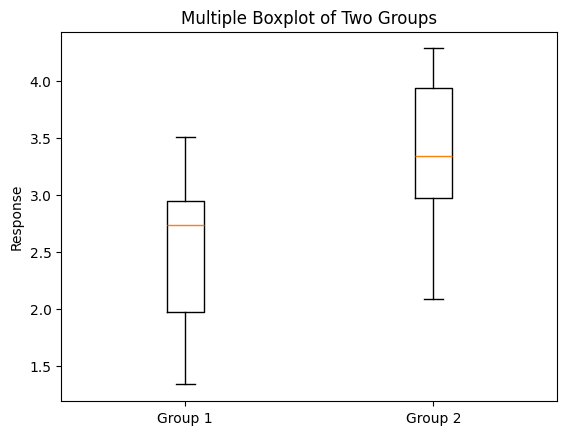

In [5]:
import matplotlib.pyplot as plt

Group1 = [1.9168, 3.5102, 3.4567, 2.7052, 1.3366, 2.7654, 2.9780, 2.8394, 2.1455, 1.7992]
Group2 = [2.9204, 3.1500, 3.3405, 2.7374, 4.0499, 3.8547, 4.1359, 4.0159, 3.4328, 2.0894,
          3.7789, 4.2853, 2.8724, 3.0208, 3.1968]

plt.boxplot([Group1, Group2], labels=['Group 1', 'Group 2'])
plt.ylabel("Response")
plt.title("Multiple Boxplot of Two Groups")
plt.show()

##### Group 1 appears to center around a median just below 2.5. Its range spans roughly from about 1.3 up to 3.5.
##### Group 2 has a higher median (around 3.2–3.3). Its values range roughly from about 2.0 up to 4.2.
##### Group 2 has somewhat higher values on average than Group 1, consistent with a possible location shift.
##### Both groups appear to have a few lower and higher points, but neither shows extreme outliers or extreme skew in the box‐plot.

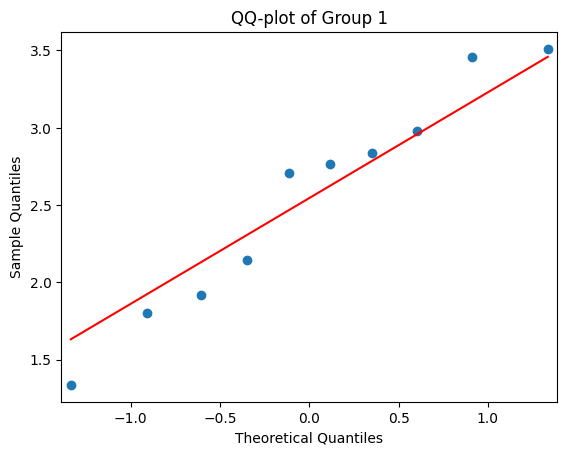

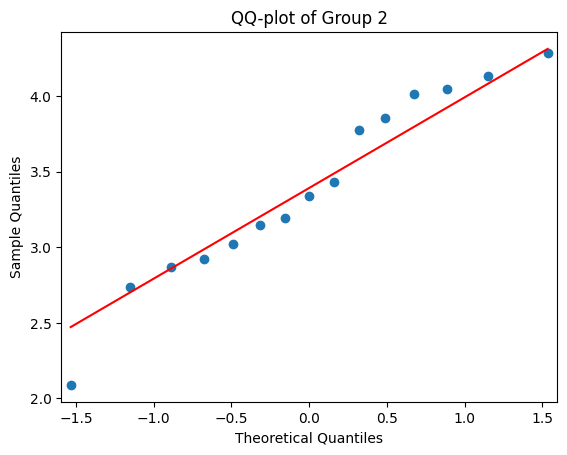

In [6]:
import numpy as np
import statsmodels.api as sm

def qq_plot(data, label):
    sm.qqplot(np.array(data), line='s')
    plt.title(f"QQ-plot of {label}")
    plt.show()

qq_plot(Group1, "Group 1")
qq_plot(Group2, "Group 2")

##### Group 1 QQ‐plot

##### Most points lie reasonably close to the straight line, although the leftmost (smallest) observation is somewhat below the line and the top couple of points lie slightly above.
##### This indicates mild deviation from perfect normality, but there is no severe skew or heavy‐tailed behavior.
##### Group 2 QQ‐plot

##### The points track the reference line quite well from about 2.0 to 4.0, with slight bending at the high end.
##### Group 2 looks fairly close to normal, with only mild departures in the right tail.

In [7]:
import numpy as np
from scipy import stats

Group1_arr = np.array(Group1)
Group2_arr = np.array(Group2)

res = stats.ttest_ind(Group1_arr, Group2_arr, equal_var=True)

print("T-statistic =", res.statistic)
print("Two-sided p-value =", res.pvalue)

T-statistic = -3.1338057977903326
Two-sided p-value = 0.004658478511253018


res.pvalue < 0.05, we reject H0 at 0.05

In [8]:
import numpy as np

Group1_arr = np.array(Group1)
Group2_arr = np.array(Group2)

obs_diff = np.mean(Group1_arr) - np.mean(Group2_arr)

B = 10000
count_extreme = 0

for _ in range(B):

    sample_g1 = np.random.choice(Group1_arr, size=len(Group1_arr), replace=True)
    sample_g2 = np.random.choice(Group2_arr, size=len(Group2_arr), replace=True)

    diff_star = np.mean(sample_g1) - np.mean(sample_g2)

    if abs(diff_star) >= abs(obs_diff):
        count_extreme += 1

p_boot = count_extreme / B
print("Bootstrap p-value =", p_boot)

Bootstrap p-value = 0.5002


In [9]:
import numpy as np
from itertools import permutations

All_data = np.array(Group1 + Group2)
m = len(Group1)
n = len(Group2)
obs_diff = np.mean(Group1) - np.mean(Group2)

num_permutations = 10000
count_extreme = 0

for _ in range(num_permutations):
    perm_indices = np.random.choice(m+n, m, replace=False)

    group1_star = All_data[perm_indices]
    group2_star = np.delete(All_data, perm_indices)

    diff_star = np.mean(group1_star) - np.mean(group2_star)

    if abs(diff_star) >= abs(obs_diff):
        count_extreme += 1

p_perm = count_extreme / num_permutations
print("Permutation test p-value =", p_perm)

Permutation test p-value = 0.0057


p < 0.05, we reject H0

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


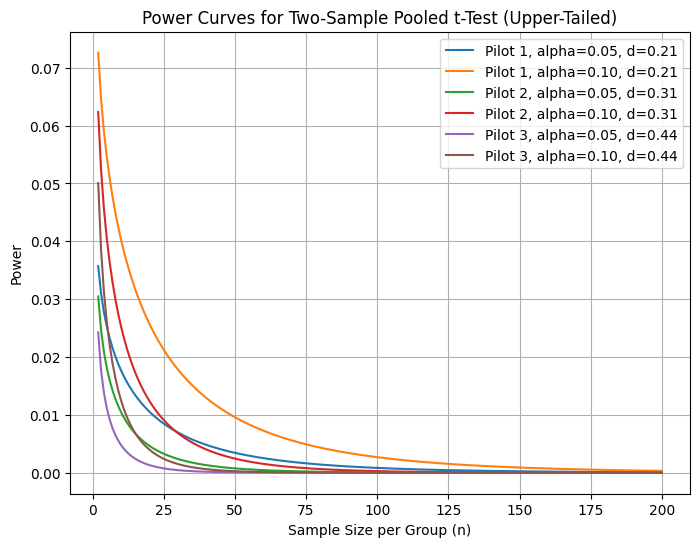

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, nct

def read_pilot_data(file_path):

    df = pd.read_csv(file_path)
    x1 = df.iloc[:, 0].dropna().values
    x2 = df.iloc[:, 1].dropna().values

    n1 = len(x1)
    n2 = len(x2)
    mean1 = np.mean(x1)
    mean2 = np.mean(x2)
    var1 = np.var(x1, ddof=1)
    var2 = np.var(x2, ddof=1)

    pooled_var = ((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)
    pooled_std = np.sqrt(pooled_var)

    return mean1, mean2, pooled_std

def estimate_effect_size(mean1, mean2, pooled_std):

    return (mean2 - mean1) / pooled_std

def power_two_sample_t(n, alpha, d):

    df = 2*n - 2

    delta = -d * np.sqrt(n/2.0)

    t_crit = t.ppf(1 - alpha, df)

    cdf_val = nct.cdf(t_crit, df, delta)

    power_val = 1.0 - cdf_val
    return power_val

file_paths = [
    "/content/drive/MyDrive/5291/HW2_P4_data1.csv",
    "/content/drive/MyDrive/5291/HW2_P4_data2.csv",
    "/content/drive/MyDrive/5291/HW2_P4_data3.csv"
]

ds = []

for fpath in file_paths:
    mean1, mean2, pstdev = read_pilot_data(fpath)
    d_est = estimate_effect_size(mean1, mean2, pstdev)
    ds.append(d_est)

n_values = np.arange(2, 201)
alphas = [0.05, 0.10]

plt.figure(figsize=(8, 6))

for i, d_val in enumerate(ds, start=1):
    for alpha in alphas:
        powers = [power_two_sample_t(n, alpha, d_val) for n in n_values]
        label_str = f"Pilot {i}, alpha={alpha:.2f}, d={d_val:.2f}"
        plt.plot(n_values, powers, label=label_str)

plt.xlabel("Sample Size per Group (n)")
plt.ylabel("Power")
plt.title("Power Curves for Two-Sample Pooled t-Test (Upper-Tailed)")
plt.legend()
plt.grid(True)
plt.show()